Mean HP for Dragon-type: 83.31
Mean HP for Grass-type: 67.27

--- Dragon vs. Grass HP Comparison ---
T-statistic: 3.3350
Two-tailed p-value: 0.0016
One-tailed p-value: 0.0008
Conclusion: There is significant evidence that Dragon-type Pokémon have higher HP than Grass-type Pokémon.

--- Legendary vs. Non-Legendary Comparison ---

Stat: HP
T-statistic: 8.9814
Two-tailed p-value: 0.0000
Conclusion: There is a significant difference in HP between Legendary and Non-Legendary Pokémon.

Stat: Attack
T-statistic: 10.4381
Two-tailed p-value: 0.0000
Conclusion: There is a significant difference in Attack between Legendary and Non-Legendary Pokémon.

Stat: Defense
T-statistic: 7.6371
Two-tailed p-value: 0.0000
Conclusion: There is a significant difference in Defense between Legendary and Non-Legendary Pokémon.

Stat: Sp. Atk
T-statistic: 13.4174
Two-tailed p-value: 0.0000
Conclusion: There is a significant difference in Sp. Atk between Legendary and Non-Legendary Pokémon.

Stat: Sp. Def
T-statist

/var/folders/rz/y5w2t9n931jd5fypn89ymc580000gn/T/ipykernel_1566/14549852.py:122: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([close_values, far_values], labels=["Close", "Far"])


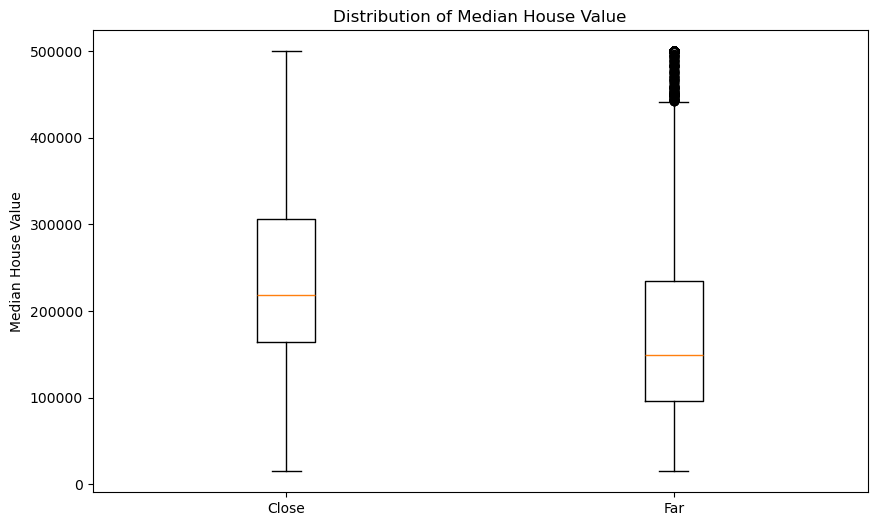

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Challenge 1: Pokémon Data

# Load the Pokémon dataset
url_pokemon = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv"
df_pokemon = pd.read_csv(url_pokemon)
df_pokemon.head()

# Part 1A: Compare HP of Dragon vs. Grass Type
# Hypothesis: Dragon-type Pokémon have, on average, higher HP than Grass-type Pokémon.

# Subset the data for Type 1 "Dragon" and "Grass"
dragon_hp = df_pokemon[df_pokemon['Type 1'] == 'Dragon']['HP']
grass_hp = df_pokemon[df_pokemon['Type 1'] == 'Grass']['HP']

# Calculate sample means for context
mean_dragon = dragon_hp.mean()
mean_grass = grass_hp.mean()
print("Mean HP for Dragon-type: {:.2f}".format(mean_dragon))
print("Mean HP for Grass-type: {:.2f}".format(mean_grass))

# Perform the two-sample t-test (unequal variances)
t_stat, p_val = st.ttest_ind(dragon_hp, grass_hp, equal_var=False)

# Since our hypothesis is directional (Dragon > Grass), we can perform a one-tailed test.
# If t_stat > 0, then one-tailed p-value = p_val/2; otherwise, one-tailed p-value = 1 - (p_val/2)
if t_stat > 0:
    p_val_one_tailed = p_val / 2
else:
    p_val_one_tailed = 1 - (p_val / 2)

print("\n--- Dragon vs. Grass HP Comparison ---")
print("T-statistic: {:.4f}".format(t_stat))
print("Two-tailed p-value: {:.4f}".format(p_val))
print("One-tailed p-value: {:.4f}".format(p_val_one_tailed))

# At 5% significance level, if one-tailed p-value < 0.05, we reject the null hypothesis.
if p_val_one_tailed < 0.05:
    print("Conclusion: There is significant evidence that Dragon-type Pokémon have higher HP than Grass-type Pokémon.")
else:
    print("Conclusion: There is not enough evidence to conclude that Dragon-type Pokémon have higher HP than Grass-type Pokémon.")

# Part 1B: Compare Stats between Legendary and Non-Legendary Pokémon
# Hypothesis: Legendary Pokémon have different stats (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) compared to Non-Legendary Pokémon.
# We perform independent two-sample t-tests (Welch's t-test) for each stat.

stats_to_test = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

print("\n--- Legendary vs. Non-Legendary Comparison ---")
for stat in stats_to_test:
    leg_stat = df_pokemon[df_pokemon['Legendary'] == True][stat]
    non_leg_stat = df_pokemon[df_pokemon['Legendary'] == False][stat]
    
    t_stat, p_val = st.ttest_ind(leg_stat, non_leg_stat, equal_var=False)
    print(f"\nStat: {stat}")
    print("T-statistic: {:.4f}".format(t_stat))
    print("Two-tailed p-value: {:.4f}".format(p_val))
    
    if p_val < 0.05:
        print(f"Conclusion: There is a significant difference in {stat} between Legendary and Non-Legendary Pokémon.")
    else:
        print(f"Conclusion: There is no significant difference in {stat} between Legendary and Non-Legendary Pokémon.")


# Challenge 2: California Housing Data

# Load the California housing dataset
url_housing = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv"
df_housing = pd.read_csv(url_housing)
df_housing.head()

# -----------------------------------------------------------
# Hypothesis: Houses close to either a school or a hospital are more expensive.
# A house is considered close if its Euclidean distance to the location is < 0.50.
# School coordinates: (-118, 34)
# Hospital coordinates: (-122, 37)
# -----------------------------------------------------------

# Define a function to calculate Euclidean distance given arrays of longitudes and latitudes
def euclidean_distance(lon, lat, lon0, lat0):
    return np.sqrt((lon - lon0)**2 + (lat - lat0)**2)

# Calculate distances from each house to the school and hospital
df_housing['dist_school'] = euclidean_distance(df_housing['longitude'], df_housing['latitude'], -118, 34)
df_housing['dist_hospital'] = euclidean_distance(df_housing['longitude'], df_housing['latitude'], -122, 37)

# Create a new column 'close' to indicate if the house is close to either a school or a hospital
df_housing['close'] = ((df_housing['dist_school'] < 0.50) | (df_housing['dist_hospital'] < 0.50))

# Check how many houses are considered close vs. far
print("\nNumber of houses close to school or hospital:")
print(df_housing['close'].value_counts())

# Compare median house values between houses that are close and far.
close_values = df_housing[df_housing['close'] == True]['median_house_value']
far_values = df_housing[df_housing['close'] == False]['median_house_value']

# Calculate the sample means for context
mean_close = close_values.mean()
mean_far = far_values.mean()
print("\nMean Median House Value for houses close: {:.2f}".format(mean_close))
print("Mean Median House Value for houses far: {:.2f}".format(mean_far))

# Perform an independent t-test (using Welch's t-test)
t_stat_housing, p_val_housing = st.ttest_ind(close_values, far_values, equal_var=False)
print("\n--- Housing Price Comparison (Close vs. Far) ---")
print("T-statistic: {:.4f}".format(t_stat_housing))
print("Two-tailed p-value: {:.4f}".format(p_val_housing))

# At 5% significance level, if p < 0.05 we reject the null hypothesis.
if p_val_housing < 0.05:
    print("Conclusion: There is significant evidence that houses close to a school or hospital have different (likely higher) prices than those far away.")
else:
    print("Conclusion: There is no significant evidence that proximity to a school or hospital affects house prices.")

# (Optional) Visualize the distribution of median_house_value for both groups
plt.figure(figsize=(10, 6))
plt.boxplot([close_values, far_values], labels=["Close", "Far"])
plt.title("Distribution of Median House Value")
plt.ylabel("Median House Value")
plt.show()
